# Learning from data: workshop 7


| Date set     | Hand-in date |
|:------------------|:-----------------------------------|
|11th March 2016  | **  Friday 25th March 2016** |


This workshop is worth 8% of the total module mark.

Candidate Number: **002600**

Note that you must hand in a BART sheet, but the main submission is an electronic 
 copy via the  [electronic hand-in system](http://empslocal.ex.ac.uk/submit/).   Friday 25th of March is a bank holiday and the university will be closed.  Electronic submissions will work, but you should hand in your BART sheet beforehand.


In [1]:
%pylab
%matplotlib inline 
figsize(10, 8)
import random
from IPython import display
import time

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Clustering with k-means

Write a function to cluster vector data using k-means. Your function should take as arguments a data matrix X and the number of clusters K and the maximum number of iterations of the algorithm:

    centres, z, S = kmeans(X, K, maxiter=20)
    
It should return a list or array of the centres, an array `z` whose length is the number of observations and whose elements specify which centre each observation is assigned to and an array `S` giving the values of the objective function at each iteration.

Your algorithm should stop when either (a) the maximum number of iterations is exceeded or (b) the assignments of points to clusters does not change from iteration to iteration.


In [2]:
#Transform dictonary into array
def makeArray(dic):
    my_arr = c_[array(dic[0]), [0]*array(dic[0]).shape[0]]
    for key in range(1, len(list(dic.keys()))):
        my_arr = concatenate((my_arr, c_[array(dic[key]), [key]*array(dic[key]).shape[0]]), axis=0)
    return my_arr
#Function that plots 3 dimensional data. 
def plotCluster3D(clust, centers):
    my_clust = makeArray(clust)
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(my_clust[:,0], my_clust[:,1], my_clust[:,2], c=my_clust[:, 3])
    ax.scatter(centers[:, 0], centers[:, 1],  centers[:, 2], s = 500, c=list(clust.keys()))
#Function that handels 3D animations (only in Ipython!).   
def plotCluster3DAnimate(clust, centers):
    my_clust = makeArray(clust)
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(my_clust[:,0], my_clust[:,1], my_clust[:,2], c=my_clust[:, 3])
    ax.scatter(centers[:, 0], centers[:, 1],  centers[:, 2], s = 500, c=list(clust.keys()))
    display.clear_output(wait=True)
    display.display(gcf())   
    
#Fuction that initiates random centers and is called once at the beginning of the Kmeans function. 
def initCenters(X, K):
    centers = random.sample(list(X[:, 0]), K)
    for i in range(1, X.shape[1]):
        centers = c_[centers, random.sample(list(X[:, i]), K)]
    return centers
#Function that updates the clusters after each iteration of the Kmeans algorithm. 
def getClusters(X, centers):
    clust ={}
    clustLi = []
    s = []
    for n in range(0, X.shape[0]):
        #This is pure python power! :D 
        c = min([(i[0], np.linalg.norm(X[n, :]-centers[i[0]])) for i in enumerate(centers)], key=lambda t:t[1]) 
        try:
            clust[c[0]].append(X[n, :])
            
        except KeyError:
            clust[c[0]] = [X[n, :]]
       
        clustLi.append(append(X[n, :], [c[0]])) 
        s.append(c[1])
    Ss = sum(s)
    return clust, clustLi, Ss
#Centroids of clusters are calculated after each iteration to determine the new centers. 
def updateCenters(clust):
    newCenters = []
    keys = sorted(clust.keys())
    for k in keys:
        newCenters.append(mean(clust[k], axis = 0))
       
    return array(newCenters)
#This function animates the clustering process. Works for any numbers of principal components, however, it is plotted
#in only two dimensions. 
def plotClusters(clust, centers, itervalue, K):
    colors ={1:'#8B008B', 2:'#00FFFF', 3:'#FF8C00', 4: '#00BFFF', 5:'#228B22', 6:'#FFD700', 
             7:'#FF69B4', 8:'#7CFC00', 9:'#778899', 10:'#CD853F', 11:'#FA8072'}
    fig = figure(figsize = (15, 10))
    ax = fig.add_subplot(111)
    for key in clust.keys(): 
        ax.plot(array(clust[key])[:, 0], array(clust[key])[:, 1], colors[key+1], marker = 'o', linestyle = '')
        ax.plot(centers[key, 0], centers[key, 1], colors[key+1], marker='o', markersize = 15 )
        
    title('K-means clustering with K = %s and iteration count: %s' % (K, itervalue), fontsize = 14)
    display.clear_output(wait=True)
    display.display(gcf())
#After each iteration this function is called to check whether the new centers are different from the old onse. If they
#are identically the clustering is terminated. 
def convergStatus(newCenters, centers):
    return [tuple(a) for a in newCenters] == [tuple(a) for a in centers]
#Main K-means function. Also able to animate in 2 and 3 dimension. 
def kmeans(X, K, maxiter = 20, animate2D = True, animate3D = False, getlist = False, plot =False):
    centers = initCenters(X, K)
    newCenters = initCenters(X, K)
    my_iter = 0 
    while convergStatus(newCenters, centers) == False and my_iter <= maxiter: 
        centers = newCenters
        clust, clusterLi, S = getClusters(X, centers)
        newCenters = updateCenters(clust)
        if animate2D == True and 'module://ipykernel.pylab.backend_inline' == matplotlib.get_backend():
            plotClusters(clust, centers, my_iter, K)
            time.sleep(0.5)
        if animate3D == True and 'module://ipykernel.pylab.backend_inline' == matplotlib.get_backend()and X.shape[1] == 3 :
            plotCluster3DAnimate(clust, centers)
        my_iter +=1 
        
    if animate3D == False and X.shape[1] == 3 and plot == True:
        plotCluster3D(clust, centers)
        
    else: 
        matplotlib.pyplot.close("all")
    if getlist == True: 
        return centers, clusterLi, S
    else: 
        return centers, clust, S

The Old Faithful data is a set of observations of the time between the eruptions of the Old Faithful geyser and the duration of each eruption (both in minutes).

In [3]:
import wget 

try: 
    geyser = loadtxt('old-faithful.txt', delimiter=' ')
except IOError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/old-faithful.txt')
    geyser = loadtxt('old-faithful.txt', delimiter=' ')
 

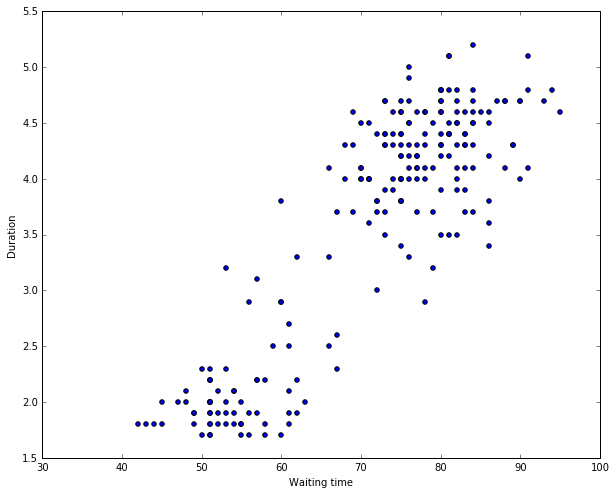

In [4]:
scatter(geyser[:,0], geyser[:,1])
xlabel('Waiting time')
ylabel('Duration')
X = geyser

Use your kmeans algorithm to cluster the Old Faithful data.  Plot the data with the cluster assignments given by your algorithm.   Note that since the data scales of the data are so different it will be important to standardise it so that the clusters are approximately circular before clustering, but you can plot the result in the original coordinates.   


In [5]:
#Standardising the data. 
xbar = mean(X, axis = 0)
my_std = std(X, axis = 0)
x = (X - xbar)/my_std

## K-means clustering animated

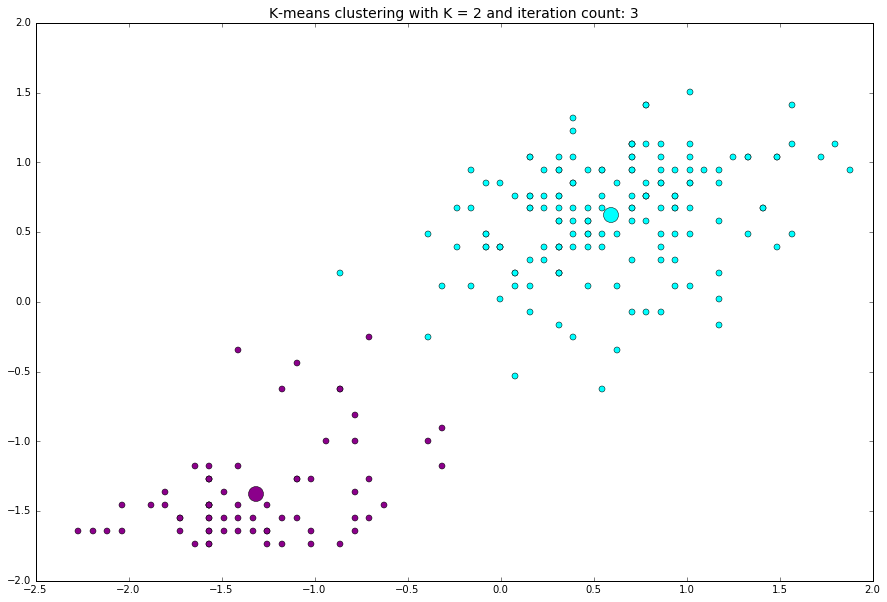

In [48]:
centers, clusters, S = kmeans(x, 2, animate2D=True)

><h2>Llyods algorithm</h2> 
><font color = "black" size = "3"> Like the k-means algorithm of the sklearn library, the function I have create uses Lloyd's algorithm to find the local minima. It runs very efficient on the geyser data with two clustes, rarely needing more than 4 iteration to find the same clusters. Also, since the inital centers are initialised at random places it can happen that the algorithm somtimes uses less clusters as the no points where assigned to the initial center due to an unfortunate position giving the other cluster(s) and advantage. This usually only happens with more than two clusters. </font>

Here it is fairly clear from the scatter plot that there are two clusters.  Investigate how the clustering and the final value of $S$ varies as you change the number of clusters.  Can you tell how many clusters there are by inspecting the change of $S_k$ with $k$?

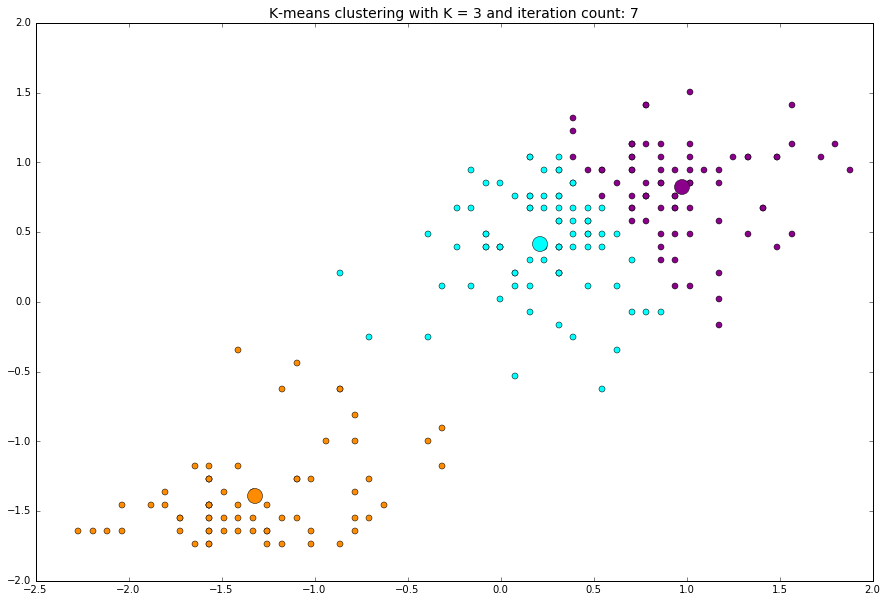

In [7]:
K = 3
centers, clusters, S = kmeans(x, K)

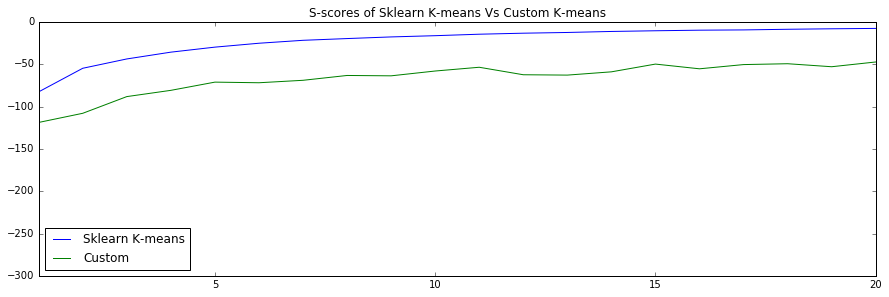

In [8]:
from sklearn.cluster import KMeans

S_scores = []
for i in range(1, 22):
    centers, clusters, S = kmeans(x, i, animate2D = False)
    S_scores.append(-S)


SkS_scores = []
for i in range(1, 22):
    y_pred = KMeans(n_clusters=i, max_iter=20).fit(x)
    SkS_scores.append(y_pred.score(x))


fig = figure(figsize = (15, 10))
ax = fig.add_subplot(211)
ax.plot(SkS_scores, label='Sklearn K-means')
ax.plot(S_scores, label='Custom')
xlim(1, 20)
ylim(-300, 0)
title('S-scores of Sklearn K-means Vs Custom K-means')
legend(loc=3)


><h2> Implications of a change in $S_k$ with $k$</h2> 
><font color = "black" size = "3">The above plot shows the relationship between the objective function and the number of clusters specified in this function. We know that the objectiv function S converges to a local minimum after each iteration and recalculation of the centers. However, it seems that S not only converges with each iteration of the algorithm but also with an increasing number of K (centers). This makes sense as more centers have to share the same amount of data leading to a decrease in average distance between center and neighbouring points. Hence, a lower S score. Also since sklearn uses 'the opposit' (negative) of that score I have also negated my results. Although the score caluclated by my algorighm exhibits the same trend as the k-means algorithm from the sklearn library, there is a significant difference in magnitude.</font>

# Principal Component Analysis

Here you will calculate the principal components of the digits data that we used previously.

The following cell loads the data and plots a randomly chosen digit as an image.


(1797, 64)


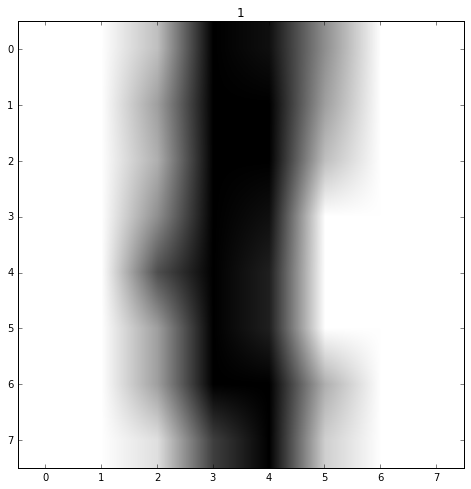

In [9]:
import sklearn.datasets
from numpy.random import randint
digits = sklearn.datasets.load_digits(n_class=10)
print(digits.data.shape)

# Pick a digit at random and plot it.  
# The title should be the number that is the digit from the target arrage
j = randint(digits.data.shape[0])
imshow(reshape(digits.data[j], (8,8)), cmap=cm.gray_r, interpolation=None)
title("%d" % digits.target[j])

As you can see there are 1797 images arranged as 64-dimensional vectors. Note that the data is arranged so that each observation $\mathbf{x}$ is a *row*.  The mathematics on the slides assumes that the observations are *column* vectors so be careful of this.

The steps to calculate the principal components are as follows:

* Mean centre the data
* Calculate the covariance matrix $S$ of the data (this should be a $64 \times 64$ matrix
* Find the eigenvectors (principal components) and eigenvalues of $S$

You should do the first two steps in the next cell.  

In [10]:
my_mean = mean(digits.data, axis = 0) 
Xs = digits.data - my_mean
S = cov(Xs.T)

The next cell finds the eigenvectors and the eigenvalues and sorts them into descending order.  It also plots the eigenvalues.

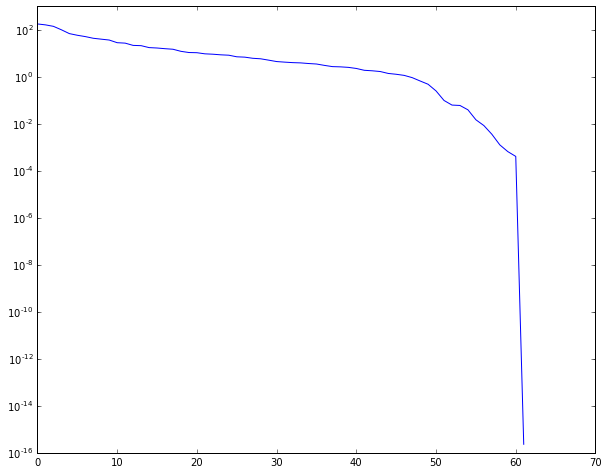

In [11]:
Lambda, Us = eigh(S)
# Put in descending order


I = argsort(-Lambda)
Lambda = Lambda[I]
Us = Us[:,I]       # Reorder the principal components too

semilogy(Lambda)

Make a plot of the cumulative fraction of the variance that is captured by using $M$ principal components versus $M$.  How many PCs are needed to capture 90%, 95% of the variance?

In oder to capture 90% of the variance 21 PCs are needed.
In oder to capture 95% of the variance 29 PCs are needed.


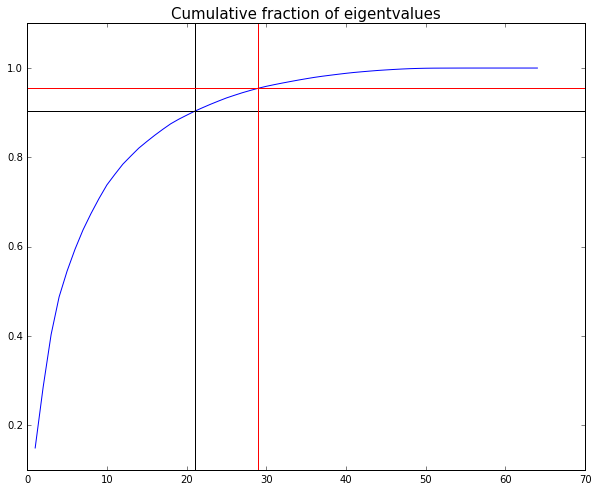

In [12]:
def componentAccur(Lambda):
    N = len(Lambda) + 1
    components = arange(1, N)
    #Finding sum of all eigenvalues
    my_sum = sum(abs(Lambda))
    #Devidin the cumulative sum by the sum to get the fraction of variance explained by the number of principal components.
    cumsum_rate = cumsum(Lambda)/my_sum 
    mm = c_[array(components), array(cumsum_rate)] 
    return mm

accur = componentAccur(Lambda)

def getMinComp(accuracy, target):
    t_accur = []
    for index, item in enumerate(accuracy[:, 1]): 
        if item > target: 
            t_accur.append([index + 1, item])
    return t_accur[0]

minComp = getMinComp(componentAccur(Lambda), 0.9)
minComp2 = getMinComp(componentAccur(Lambda), 0.95)

plot(accur[:, 0], accur[:,1])
title('Cumulative fraction of eigentvalues', fontsize = 15)
axhline(y= minComp[1], hold=None, color='black')
axvline(x= minComp[0], hold=None, color='black')
axhline(y= minComp2[1], hold=None, color='red')
axvline(x= minComp2[0], hold=None, color='red')

print('In oder to capture 90%% of the variance %s PCs are needed.' % minComp[0])
print('In oder to capture 95%% of the variance %s PCs are needed.' % minComp2[0])

><h2>How many PC's are needed to capture 90% and 95% of the variance?</h2> 
><font color = "black" size = "3">The plot illustrates that in order to capture 90% of the variance we need to uses at least 21 principal components. To capture 95% of the variance we need 29 PC'S. This shows the accuracy rate decreases when the principal components increase.  </font>

## Reconstruction of the digits

As was done for the face data set in lectures, project a digit  (choose one!) onto increasing numbers of principal components and visualise the result as an image.  You will get better recontructions if you add the mean image to the projection before visualising it.  That is form and plot as an image
\begin{align*}
\hat{\mathbf{x}} = U_M U_M^T \mathbf{x} + \bar{\mathbf{x}}
\end{align*}
where $\mathbf{x}$ is the mean centred image, $\bar{\mathbf{x}}$ is the mean image and $U_M$ is the matrix whose $M$ columns are the first $M$ principal components.

Based on these reconstructions, how many dimensions do you think are needed to well represent an image?

In [42]:
def getU(Us, n):
    return Us[:, :n]

#This function plots a series of random digits in order of increasing principal components. 
def compareNumbersPC(featureMatrix, data, ncomp):
     for n in range(0, ncomp):
        I = randint(Xs.shape[0])
        my_digit = Xs[I, :]
        my_target = digits.target[I]
        fig = figure(figsize = (20, 20))
        for i in range(1, 8):
            M = getU(Us, i*3)
            my_image = M @ M.T@ my_digit + my_mean
            ax = fig.add_subplot(8, 8, i)
            ax.imshow(reshape(my_image, (8,8)), cmap=cm.gray_r, interpolation=None)
            title('%s: Number of PCs = %s' % (my_target, i*3))
        
%matplotlib inline

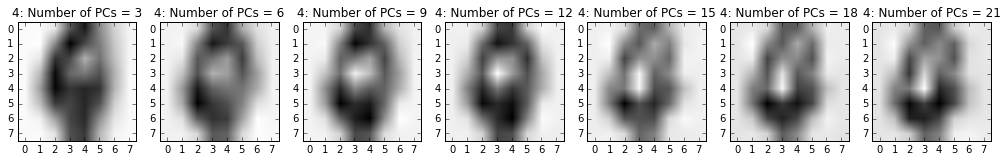

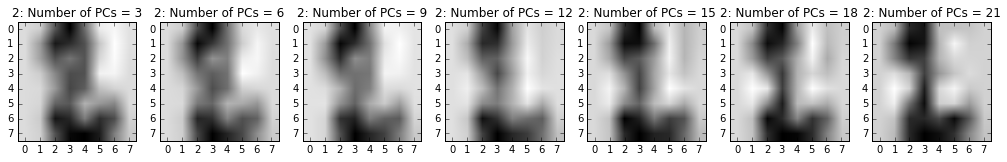

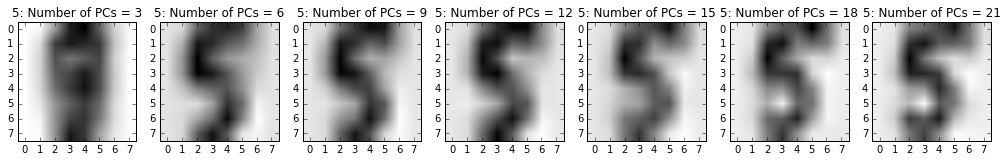

In [43]:
compareNumbersPC(Us, Xs, 3)

Knn needs 6 PCs to attain a accuracy of 95%


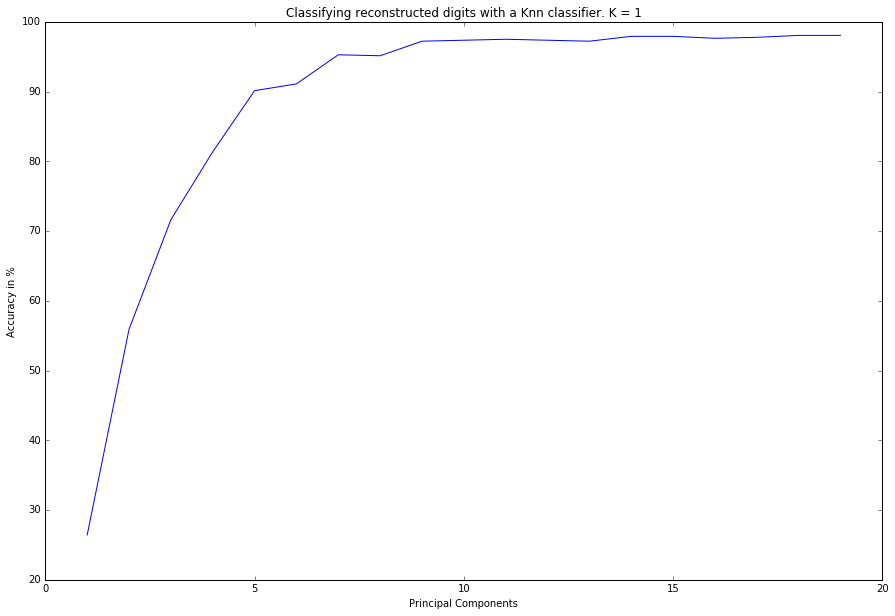

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation

def getAccuracy(predictions, tte):
    correct = (sum(tte == predictions)/len(tte))*100
    return correct
    
def convertData(Xs, U, nU):
    u = getU(U, nU)
    PCdigits = []
    for i in range(0, Xs.shape[0]):
        my_digit = Xs[i, :]
        redu_digits = u @ u.T@ my_digit + my_mean
        PCdigits.append(redu_digits)
    return array(PCdigits)

def testDimKnn(Xs, U, n):
    conv_data = convertData(Xs, U, n)
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(conv_data, digits.target, test_size=0.4, random_state=0)
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y = knn.predict(X_test)
    accur = getAccuracy(y, y_test)
    return accur

pred = []
xrange = []
for i in range(1, 20):
    pred.append(testDimKnn(Xs, Us, i))
    xrange.append(i)

fig = figure(figsize = (15, 10))
ax = fig.add_subplot(111)
ax.plot(xrange,pred)
title('Classifying reconstructed digits with a Knn classifier. K = 1')
ylabel('Accuracy in %')
xlabel('Principal Components')
print('Knn needs %s PC''s to attain a accuracy of 95%%' % ([i for i,x in enumerate(pred) if x > 95][0]))


><h2>Man Vs Machine</h2> 
><font color = "black" size = "3">In order to determine how many principal components are needed to sufficiently reconstruct the digits, I tested my ability to recognise the digits agains the ability of a machine that uses a K-next-neigbours classifier to determine what digits are represented in the images. I firstly printed 3 random digits, each 8 times with an increasing number of principal components(in this case 3-21). Although this is a very subjective measure, I found that on average I need at least 9 principal components to identify the digit in the image. Suprisingly the Knn classifier only needs 6 PC's to attain a accurcay rate of 95%, which I think is quite remarkable. However, the human ability to recognise the digits very much depends on the type of the digits. From the above image plot it can be seen that it is a lot harder to recognise a 5 or 8 then a 2.</font>

## Visualisation in reduced dimensions

Recall that the low dimensional representation of the data is given by 
\begin{align*}
\tilde{\mathbf{x}} = U_M^T \mathbf{x}
\end{align*}

Find $\tilde{\mathbf{x}}$ with $M = 2$ for all the $\mathbf{x}$ in the digit data.  (Do this as a single matrix multiplication rather than writing a loop!)

In [16]:
Xtilde = Us[:,:2].T @ Xs.T
print(Xtilde.shape)

(2, 1797)


Assuming that your 2-dimensional representations are stored as the columns of <code>Xtilde</code> (which should have shape (2, 1797)), then you can visualise the digit data as follows.  Here the true labels of the digits are used to colour each $\tilde{\mathbf{x}}$ so that the clusters of different digits are evident.

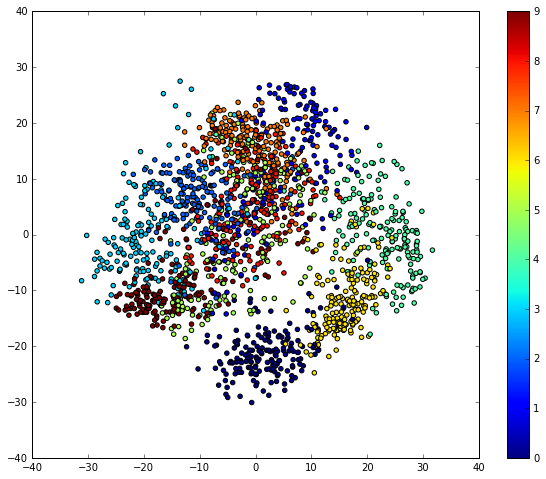

In [17]:
scatter(Xtilde[0,:], Xtilde[1,:], c=digits.target)
colorbar()

Two dimensions are not really enough to separate the clusters, but it looks a bit better in 3D.  Form the 3D projection in <code>Xtilde</code> and use something like the following to draw a 3D scatter plot. 

So that you can rotate the resulting figure, this uses <code>%matplotlib</code> to make the plot in a separate window and you should be able to rotate the plot using the mouse.  This will only work if you are sitting at the computer running the IPython kernel.

In [18]:
# Project into 3D
Xtilde = Us[:,:3].T @ Xs.T

Using matplotlib backend: MacOSX


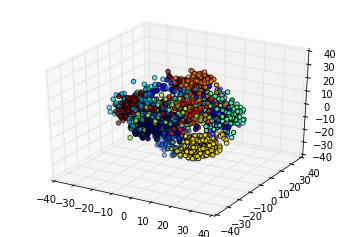

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib
# Make plots in a separate window so that you can rotate them
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xtilde[0,:], Xtilde[1,:], Xtilde[2,:], c=digits.target)

# Plots back in the notebook
#%matplotlib inline

In [37]:
%matplotlib
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xtilde[0,:], Xtilde[1,:], Xtilde[2,:], c=digits.target)

Using matplotlib backend: MacOSX


# Clustering in reduced dimensions

Cluster your 3D low-dimensional representation of the digits data using your k-means function.  Assume that you know there are 10 clusters but evaluate the quality of the clustering using the normalised mutual information as described below.

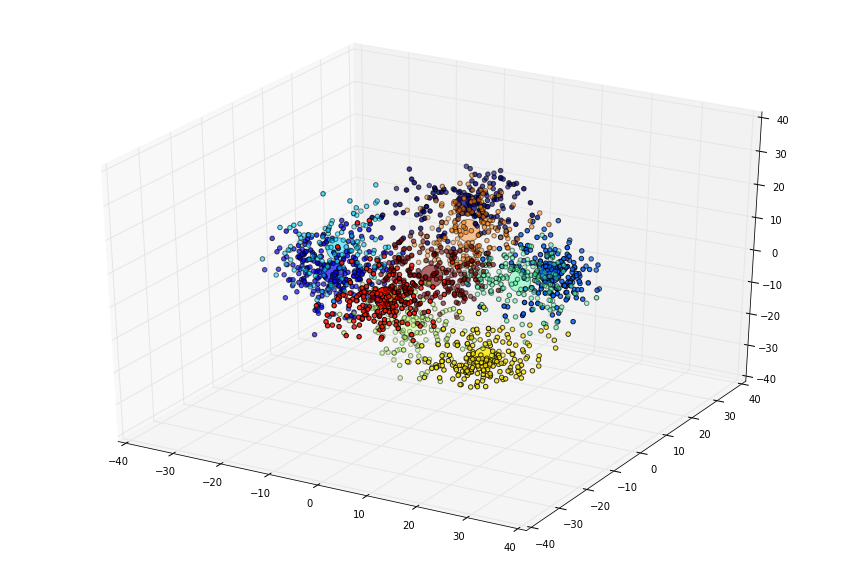

In [47]:
%matplotlib inline
#%matplotlib inline
centers, clusters, S = kmeans(Xtilde.T, 10, animate2D = False, animate3D = True, plot = True)

><h2>Clustering in 3D animated!</h2> 
><font color = "black" size = "3">Here, I animated the clustering iterations in a 3D space. It illustrates how the centers are moving into their cluster clouds. With ten centers the algorithm tends to need more than 20 iterations. However, we will see later that this will still give satisfying result when we look at the mutual informations of true sample and the clusters in low dimensions.</font>

## Digit clustering animated in 2D

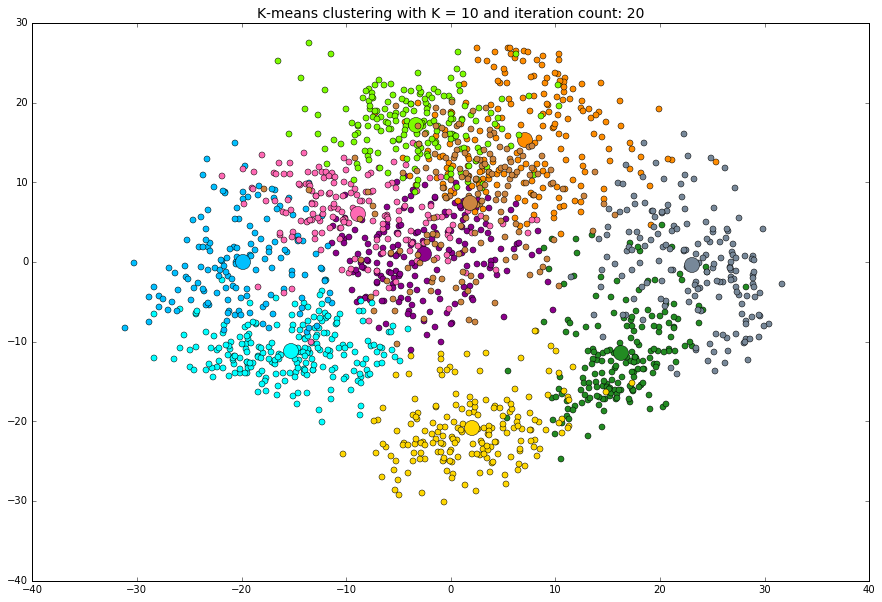

In [25]:
centers, clusters, S= kmeans(Xtilde.T, 10, animate2D = True, plot = False)

><h2>Clustering in 2D animated!</h2> 
><font color = "black" size = "3">This 2D animation illustrates how 3D clustering looks like in 2 dimensions. One can see how the points are stack upon each other.</font>

In [30]:
#This function plots the clusters found above seperately. 
def plotCluster3DSep(myclust, centers):
    colors ={1:'#8B008B', 2:'#00FFFF', 3:'#FF8C00', 4: '#00BFFF', 5:'#228B22', 6:'#FFD700', 
         7:'#FF69B4', 8:'#7CFC00', 9:'#778899', 10:'#CD853F', 11:'#FA8072'}
    fig = plt.figure(figsize = (18, 6))
    
    for i in set(myclust[:, 3]):
        x = myclust[myclust[:, 3]==i]
        ax = fig.add_subplot(2,5,i+1, projection='3d')
        ax.scatter(x[:,0], x[:,1], x[:,2], c=colors[i+1])
#This function plots the true classes of the digit data seperately.       
def plotCluster3DSepDigit(data, target):
    colors ={1:'#8B008B', 2:'#00FFFF', 3:'#FF8C00', 4: '#00BFFF', 5:'#228B22', 6:'#FFD700', 
         7:'#FF69B4', 8:'#7CFC00', 9:'#778899', 10:'#CD853F', 11:'#FA8072'}
    fig = plt.figure(figsize = (18, 6))
    
    for i in set(target):
        x = data[target==i]
        ax = fig.add_subplot(2,5,i+1, projection='3d')
        ax.scatter(x[:,0], x[:,1], x[:,2], c=colors[i+1])
        title('Digit %s' %i)


## Comparing K-means clusters with true classes

In [31]:
cent, clustList, S = kmeans(Xtilde.T, 10, animate2D = False, plot = False, getlist = True)

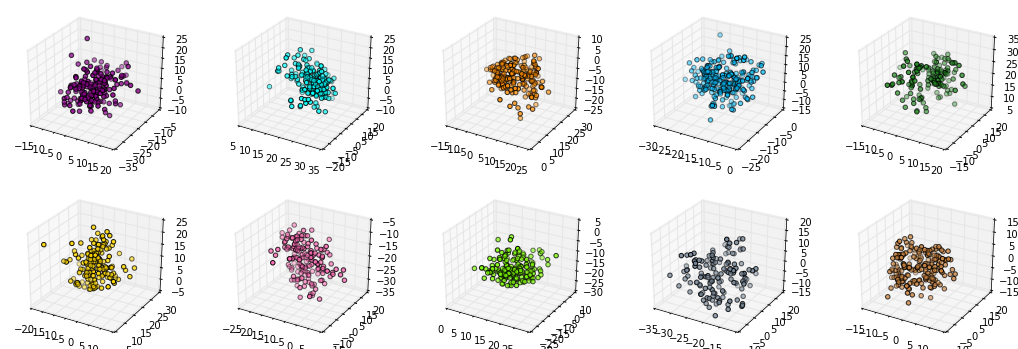

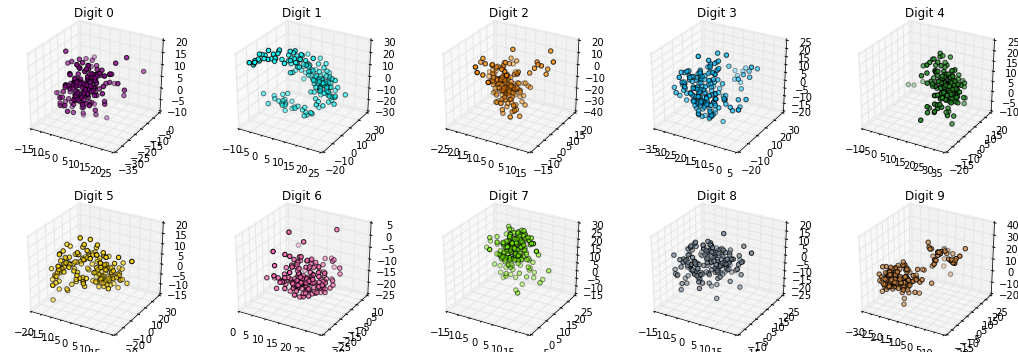

In [33]:
set(array(clustList)[:, 3])
plotCluster3DSep(array(clustList), centers)
plotCluster3DSepDigit(Xtilde.T, digits.target)

><h2>Comparing clusters with true classes</h2> 
><font color = "black" size = "3">Here I attempted a visual approach to show the difference between the clusters produced by my K-means function and the true classes of the digit data. The first two rows are the clusters produced by the K-means algorithm and the second two rows are the true classes (colors are matching!). Although some of the clusters are similar, it is hard to identify the efficiency of the clustering with the naked eye. However, what one can see is that the K-means clusters tend to be spherical and appear to be ineffective to identify curved or seperated clusters (e.g. Digit 1 and Digit 9). </font>

## Normalised mutual information

The "true" labels are seldom available in clustering.  However, if the labels are available it may still be difficult to compare the labels found by a clustering algorithm with the "true" labels, because the labels may be permuted without changing the quality of the clustering.  Thus, for example, if an algorithm finds the following labels for 8 data points:

    U = [ 0, 0, 2, 3, 1, 1, 0, 1] 
    
then the labels

    V = [3, 3, 0, 1, 2, 2, 3, 2]
 
are equivalent under the permutation $0 \rightarrow 3$, $ 1 \rightarrow 2$, $2 \rightarrow 0$ and $ 3 \rightarrow 1$.

The standard way of circumventing this is to use the normalised mutual information between the two sets of labels as a measure of the quality of the clustering.  The normalised mutual information is invariant to label permutation and is closely related to the Kullback-Leibler divergence between the probability distributions of the two labellings.  The following is lightly modified from the [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html#mutual-information-based-scores)  and the [Wikipedia page on mutual information](https://en.wikipedia.org/wiki/Mutual_information). 

Let $U$ and $V$ be two label assignments of the same $N$ objects.  Then the entropy $H(U)$ is a measure of the expected information in the assignment of the items to the labels:
\begin{align*}
H(U) = - \sum_{i=1}^{|U|}P(i)\log(P(i))
\end{align*}
where $P(i) = |U_i| / N$ is the probability that an object picked at
random $U$ is in class/cluster $U_i$.  Similarly for $H(V)$.  The mutual information between the labellings $U$ and $V$ is defined as:
\begin{align*}
I(U, V) = \sum_{i=1}^{|U|}\sum_{j=1}^{|V|}P(i, j)\log\left(\frac{P(i,j)}{P(i)P'(j)}\right)
\end{align*}
where $P(i, j) = |U_i \cap V_j| / N$ is the joint probability that an item chosen at random falls into both $U_i$ and $V_j$.  The mutual information measures the information that $U$ and $V$ share: it measures how much knowing one of these variables reduces uncertainty about the other. For example, if $U$ and $V$ are independent, then knowing $U$ does not give any information about $V$ and vice versa, so their mutual information is zero. At the other extreme, if $U$ is a deterministic function of $V$ and $V$  is a deterministic function of $U$ then all information conveyed by $U$ is shared with $V$; knowing $U$ determines the value of $V$ and vice versa.

It's easy to check that the mutual information (unlike the Kullback-Leibler divergence) is symmetric in its arguments.  Its minimum value is zero, when $U$ and $V$ are independent, and its maximum value is the entropy $H(U) = H(V)$ when $U$ and $V$ are deterministically related. 

The normalised mutual information is the mutual information normalised so that the maximum value is 1 when the cluster labels $U$ and $V$ agree.  Thus:
\begin{align*}
NMI(U, V) = \frac{I(U, V)}{\sqrt{H(U)H(V)}}
\end{align*}
The mutual information and normalised information can be calculated by counting the number of observations that fall into each of the classes and then using the above equations.  Fortunately routines to calculate them are available from `sklearn.metrics`.  For example:

In [34]:
from sklearn import metrics

U = [0, 0, 2, 3, 1, 1, 0, 1] 
V = [3, 3, 0, 1, 2, 2, 3, 2]
W = [3, 0, 1, 1, 0, 2, 0, 3]

Iuv = metrics.mutual_info_score(U, V)
Iuw = metrics.mutual_info_score(U, W)

print("Mutual informations:", Iuv, Iuw)

NMIuv = metrics.normalized_mutual_info_score(U, V)
NMIuw = metrics.normalized_mutual_info_score(U, W)

print("Normalised mutual informations:", NMIuv, NMIuw)

Mutual informations: 1.25548232518 0.670215921788
Normalised mutual informations: 1.0 0.520446851438


The normalised mutual information can also be adjusted for chance to counter the effect that the mutual information tends to increase as the number of clusters increases.  See [sklearn page on clustering quality metrics](http://scikit-learn.org/stable/modules/clustering.html) and [Vinh, Epps, and Bailey, (2010). *Information Theoretic Measures for Clusterings Comparison: Variants, Properties, Normalization and Correction for Chance*, JMLR](http://jmlr.csail.mit.edu/papers/volume11/vinh10a/vinh10a.pdf).  The normalised mutual information adjusted for this effect is calculated with 
`sklearn.metrics.adjusted_mutual_info_score`:

In [35]:
AMIuv = metrics.adjusted_mutual_info_score(U, V)
AMIuw = metrics.mutual_info_score(U, W)

print("Adjusted mutual informations:", AMIuv, AMIuw)

Adjusted mutual informations: 1.0 0.670215921788


Recall that the true label of each of the digits is given by <code>digits.target</code>. Use the normalised mutual information to assess how the quality of the clustering varies as the number of principal components  onto which you project the digits data increases.  How many dimensions do you think are needed to properly represent these data?  Why? 

In [36]:
Xtilde = Us[:,:3].T @ Xs.T
centers, clusters, S = kmeans(Xtilde.T, 3, animate2D = False, getlist = True)
print(array(clusters)[:, 3])

[ 2.  1.  1. ...,  1.  0.  0.]


Number of principal components to choose: 24


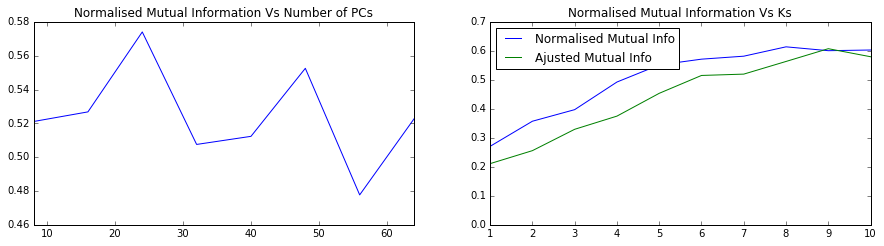

In [120]:
def getInfoScore(Us, K, comp):
    Xtilde = Us[:,:comp].T @ Xs.T
    centers, clusters, S = kmeans(Xtilde.T, K, animate2D = False, getlist = True)
    U = array(clusters)[:, int(comp)]
    V = digits.target
    NMinfoScore = metrics.normalized_mutual_info_score(U, V)
    return NMinfoScore

def getAdjInfoScore(Us, K, comp):
    Xtilde = Us[:,:comp].T @ Xs.T
    centers, clusters, S = kmeans(Xtilde.T, K, animate2D = False, getlist = True)
    U = array(clusters)[:, int(comp)]
    V = digits.target
    AdjinfoScore = metrics.adjusted_mutual_info_score(U, V)
    return AdjinfoScore


test = arange(8, 72, 8)
PCscores = []
Kscores= []
KscoresAdj= []
for i in test: 
    PCscores.append(getInfoScore(Us, 5, i))
for i in range(1, 12):
    KscoresAdj.append(getAdjInfoScore(Us, i, 3))
    Kscores.append(getInfoScore(Us, i, 3))

fig = figure(figsize = (15,8))
ax = fig.add_subplot(221)
ax.plot(test, PCscores)
xlim(8, 64)
title('Normalised Mutual Information Vs Number of PCs')
ax2 = fig.add_subplot(222)
ax2.plot(Kscores, label= 'Normalised Mutual Info')
ax2.plot(KscoresAdj, label ='Ajusted Mutual Info')
title('Normalised Mutual Information Vs Ks')
xlim(1, 10)
legend(loc = 2)

print('Number of principal components to choose: %s' % test[[i for i,x in enumerate(PCscores) if x == max(PCscores)][0]])

><h2>Mutual information and component selection</h2> 
><font color = "black" size = "3">Considering the analyisis of the variance captured by the eigenvalues and the the reconstruction accuracy of the digits we have seen a consisten yet somewhat obvious trend. The more principal components are used in the analyisis the better we can explain the underlying data. However, the effectivness of K-means clustering appears to behave differently. The above diagram shows that for a given number of centers (K's), an increase in the principal components can reduce the normalised mutual information of the clusters and the true data. Hence, the clustering is maybe improved by reducing the dimensions. This maybe due to the fact that PCA reduces the classification space as well as decreases the amount of irrelevant features that are taken into account and hence makes it easier for the K-means algorithm to cluster the data. Since the K-means only finds local minima and it is set to a 20 iteration maximum, the clustering can be quit different every time it is run. As a result the optimal number of principal components that is suggested by the maximum normalised mutual information value can be quite different. However, it tends to be between 20 and 30 PC's. Also, in a given number of dimensions an increase in centers always increase mutual information (right diagram).</font>